### Non Negative matrix factorisation function with Log Loss graph.

**Import Dependencies**

In [26]:
# Import Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

**Initialise the rank of V and Wtrue and Htrue to normalise V**

In [39]:
# Low Rank
r = 6

Wtrue = np.random.rand(40, 5)
Htrue = np.random.rand(5,10)

V0 = Wtrue @ Htrue

m, n = V0.shape

V = np.zeros((m,n))
for i in range(n):
    V[:,i] = V0[:,i] / np.max(V0[:,i])

W = np.random.rand(m,r)
H = np.random.rand(r,n)

max_iter = 30000

**Call the nmf function to complete the iterative algorithm**

9.688555556456399e-09


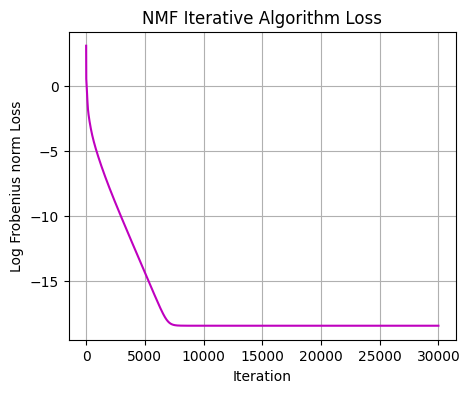

In [40]:
def _non_matrix_factorisation(V, W, H, max_iterations=600):
    '''
    Iterative non negative matrix factorisation function.

    Parameters:
    V: nxn matrix holding the positive data
    W: nxk matrix which will converge to an approximate factor of V.
    H: kxn matrix which will converge to an approximate factor of V.

    Returns:
    W: The updated positive W matrix for the formula V Approx= WH
    H: The updated positive H matrix for the formula V Approx= WH
    loss: List of loss values accumulated from the nmf.
    '''
    loss = np.zeros((max_iterations, 1))
    loss[0] = np.linalg.norm(V - W @ H, ord="fro")

    for iter in range(max_iterations-1):
        # Update W and H using hadamard product and update rules.
        H = H * ((W.T @ V) / (W.T @ W @ H + 1e-9))
        W = W * ((V @ H.T) / (W @ (H @ H.T) + 1e-9))
        # Measure Frobenius Loss.
        f[iter+1] = np.linalg.norm(V - W @ H, ord="fro")
    return W, H, loss


def _display_nmf_loss(loss):
    '''
    Displays the loss on a line graph in matplotlib.

    Parameters:
    loss: A list of loss values accumulated by the Non Matrix Factorisation iterative algorithm.

    Returns:
    None
    '''

    fig, ax = plt.subplots(figsize=(5,4))
    ax.plot(np.arange(max_iter), np.log(f), c="m")
    ax.grid(True)
    ax.set_ylabel("Log Frobenius norm Loss")
    ax.set_xlabel("Iteration")
    ax.set_title("NMF Iterative Algorithm Loss")
    print(np.linalg.norm(V - W @ H, ord="fro"))

W, H, loss = _non_matrix_factorisation(V,W,H,max_iterations=max_iter)
_display_nmf_loss(loss)
